<a href="https://colab.research.google.com/github/zzickso/DeepLearning/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C(%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B8%B0%EC%B4%88_%EC%A1%B0%EB%B3%84%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/drive/MyDrive/test/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 데이터 확인 용
# for data in df.values:
#     print(type(data))

## Amount normalization append

**아 그렇게 살지 마시라고요**<br>
**말을 똑바로 하셨어야죠!!**

In [4]:
class_list = df.values[:,-1]
df['normAmount'] = df['Amount']
df = df.drop(columns=['Class'])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,10.00


In [5]:
print(class_list)

[0. 0. 0. ... 0. 0. 0.]


In [6]:
amount = []
for data in df.values:
    amount.append([data[-1]])
# amount = np.array(amount)

print(len(amount))
print(type(amount))
# print(amount)

284807
<class 'list'>


Amount Normalization 진행

<h1>Min-Max Scaler를 사용하였고 => Amount에 적용<br>
Z score Scaler => V1 ~ V28까지 이미 적용 되어있는 것.</h1>

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(amount))
norm_amount = scaler.transform(amount).flatten() # ==> np.reshape(-1)
print(norm_amount[0])
print(amount[0])

MinMaxScaler(copy=True, feature_range=(0, 1))
0.005823793086804956
[149.62]


데이터에 추가.

In [10]:
for index, data in enumerate(df.values):
#     print(index)
    data[-1] = norm_amount[index]

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000030
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000389


class_list : 라벨들.<br>
df : 정규화까지 완료된 데이터들.

In [11]:
df['Class'] = df['normAmount']

In [12]:
for index, data in enumerate(df.values):
    data[-1] = class_list[index]

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000030,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000389,0.0


**데이터 셔플**<br>


암호 -> 123 -> 다음번에 돌릴때도 123해놓으면 똑같은 값들이 나온다

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.0


In [15]:
data_shuffled=df.sample(frac=1,random_state = 123).reset_index(drop=True) # 암호 -> 123
data_shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,0.561420,0.072299,-0.927072,1.038824,0.405817,0.142775,-0.336206,0.889158,0.836360,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.00,0.001946,0.0
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,-1.552107,-0.415248,1.040340,-0.533137,0.076196,1.220128,-0.147484,-1.221457,0.878026,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.00,0.002258,0.0
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,0.973005,0.852258,0.061353,-0.585198,-0.655957,0.304602,0.269934,0.493657,-0.119614,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.00,0.007707,0.0
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,-0.231315,0.401726,0.405439,-1.652165,-1.793721,-1.252411,1.285789,-0.353220,-0.399857,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.00,0.003192,0.0
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,-0.174764,-0.447357,0.254833,0.156966,-0.216825,1.529087,-0.607303,-0.288013,1.180082,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.75,0.003649,0.0


In [16]:
class_list = data_shuffled.values[:,-1]
data_shuffled = data_shuffled.drop(columns=['Amount','Class'])
print(class_list)

[0. 0. 0. ... 0. 0. 0.]


In [17]:
data_shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,0.561420,0.072299,-0.927072,1.038824,0.405817,0.142775,-0.336206,0.889158,0.836360,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,0.001946
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,-1.552107,-0.415248,1.040340,-0.533137,0.076196,1.220128,-0.147484,-1.221457,0.878026,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,0.002258
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,0.973005,0.852258,0.061353,-0.585198,-0.655957,0.304602,0.269934,0.493657,-0.119614,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0.007707
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,-0.231315,0.401726,0.405439,-1.652165,-1.793721,-1.252411,1.285789,-0.353220,-0.399857,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,0.003192
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,-0.174764,-0.447357,0.254833,0.156966,-0.216825,1.529087,-0.607303,-0.288013,1.180082,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0.003649


학습 데이터셋

In [18]:
x = data_shuffled.values
y = class_list
print(x.shape)
# x_train => 
# x_test =>

(284807, 30)


모델링

In [19]:
model = Sequential()
model.add(Dense(250, input_dim=30, activation='relu' ))
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               7750      
_________________________________________________________________
dense_1 (Dense)              (None, 124)               31124     
_________________________________________________________________
dropout (Dropout)            (None, 124)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                7750      
_________________________________________________________________
dense_3 (Dense)              (None, 31)                1953      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32        
Total params: 48,609
Trainable params: 48,609
Non-trainable params: 0
____________________________________________________

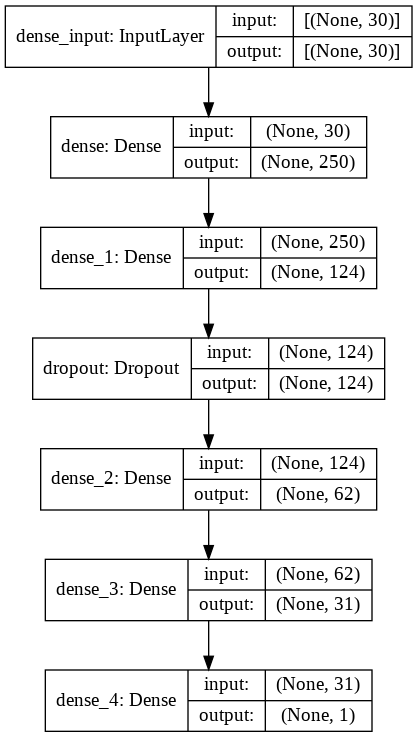

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

학습 진행

In [22]:
# 모델을 실행합니다.
history_1 = model.fit(x, y, epochs=5, batch_size=100) # batch_size 

Epoch 1/5
2849/2849 [==============================] - 9s 3ms/step - loss: 17.3999 - accuracy: 0.9923
Epoch 2/5
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0174 - accuracy: 0.9979
Epoch 3/5
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0224 - accuracy: 0.9982
Epoch 4/5
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0138 - accuracy: 0.9982
Epoch 5/5
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0769 - accuracy: 0.9977


492 / 284315 = 0.001727485630620034 => 0.0017%의 확률이므로 0으로 찍어도 최소 99.82%는 나온다.<br>
해야하는 것 : 
1. 492를 뻥튀기 <br>-> 여러 번 반복한다

=> 데이터가 일그러진다 조작된다 -> 영향이 가지 않을까?
-> 일리가 있다. 하지만 대체할 수 없기 때문에 시도를 해 보는것이다
==> 알수 있는것 : 블랙박스다(= 모른다)<br>

2. 28만개를 좀 줄인다.
3. 이상치를 걸러내본다.

In [23]:
def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'accuracy']
    plt.rcParams["figure.figsize"] = (14,10)
    for n, metrics in enumerate(metrics):
        name = metrics.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
        #plt.plot(history.epoch, history.history['val_'+ metrics],
        #     color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metrics == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metrics == 'accuracy':
            plt.ylim([0.9,1.1])
        else:
            plt.ylim([0,1])
        plt.legend()

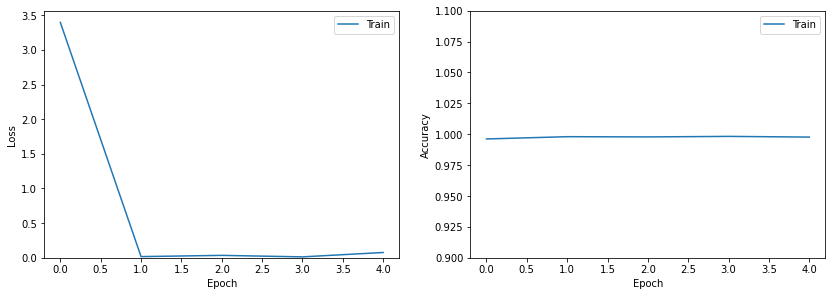

In [24]:
plot_metrics(history_1)

손실, 정확도,

실질적으로 여기 아래 부분을 복사를 하던 해서 커스텀 하시면 됩니다,

**정상 vs 비정상(사기) 데이터 구분하기**<br>
추후 진행

In [25]:
df_2 = df.drop(columns=['Amount'])

In [64]:
fraud = []
non_fraud = [] # 건드려야할 데이터.
for data in df_2.values:
    if data[-1] == 1:
        fraud.append(data)
    else:
        non_fraud.append(data)

print(len(fraud))
print(len(non_fraud))

492
284315


In [65]:
fraud[0]

array([ 4.06000000e+02, -2.31222654e+00,  1.95199201e+00, -1.60985073e+00,
        3.99790559e+00, -5.22187865e-01, -1.42654532e+00, -2.53738731e+00,
        1.39165725e+00, -2.77008928e+00, -2.77227214e+00,  3.20203321e+00,
       -2.89990739e+00, -5.95221881e-01, -4.28925378e+00,  3.89724120e-01,
       -1.14074718e+00, -2.83005567e+00, -1.68224682e-02,  4.16955705e-01,
        1.26910559e-01,  5.17232371e-01, -3.50493686e-02, -4.65211076e-01,
        3.20198199e-01,  4.45191675e-02,  1.77839798e-01,  2.61145003e-01,
       -1.43275875e-01,  0.00000000e+00,  1.00000000e+00])

데이터 관리

In [66]:
# 사기 데이터 늘리기
for i in range(2):
    l = len(fraud)
    for index in range(l):
        fraud.append(fraud[index])
print(len(fraud))

1968


In [67]:
p_data = []
for data in fraud:
    p_data.append(data)
        
for i in range(1000):# 1. 값 = 비율 조절. 돌려보는 (정상데이터)
    p_data.append(non_fraud[i])

print(len(p_data)) #사기데이터 + 정상데이터

2968


정상 : 91% vs 비정상 : 9%

데이터 스플릿<br>
85:15

In [68]:
p_data = np.array(p_data)

x = p_data[:,:-1]

y = p_data[:,-1]

In [69]:
print(len(x[0]))

30


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [71]:
model = Sequential() # 2. 이거 만들어보기.
model.add(Dense(100, input_dim=30, activation='relu' ))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
#tf.keras.metrics.Precision(name=

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_18 (Dense)             (None, 13)                338       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 14        
Total params: 9,777
Trainable params: 9,777
Non-trainable params: 0
____________________________________________________

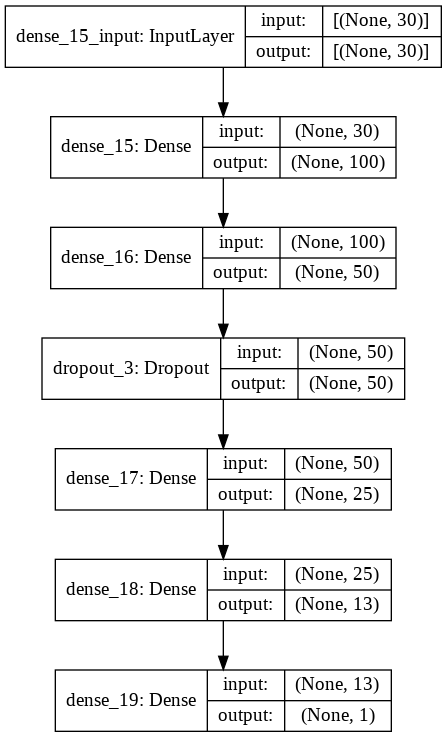

In [73]:
tf.keras.utils.plot_model(model, show_shapes=True)

학습 진행

In [74]:
# 모델을 실행합니다.
history_2 = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test,y_test)) # batch_size 

Epoch 1/20
24/24 [==============================] - 2s 32ms/step - loss: 219.0114 - accuracy: 0.5806 - precision: 0.6446 - recall: 0.7657 - val_loss: 11.0784 - val_accuracy: 0.6751 - val_precision: 0.6751 - val_recall: 1.0000
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 11.1564 - accuracy: 0.6665 - precision: 0.6659 - recall: 1.0000 - val_loss: 6.0215 - val_accuracy: 0.6751 - val_precision: 0.6751 - val_recall: 1.0000
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 9.3058 - accuracy: 0.6507 - precision: 0.6501 - recall: 0.9964 - val_loss: 4.5452 - val_accuracy: 0.6801 - val_precision: 0.6785 - val_recall: 1.0000
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 5.8567 - accuracy: 0.6731 - precision: 0.6720 - recall: 0.9948 - val_loss: 3.4001 - val_accuracy: 0.6852 - val_precision: 0.6820 - val_recall: 1.0000
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 4.6829 - accuracy: 0.6738 - precisi

In [75]:
def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'accuracy']
    plt.rcParams["figure.figsize"] = (14,10)
    for n, metrics in enumerate(metrics):
        name = metrics.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
        plt.plot(history.epoch, history.history['val_'+ metrics],
            color=colors[0], linestyle="--", label='Test')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metrics == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metrics == 'accuracy':
            plt.ylim([0.5,1])
        else:
            plt.ylim([0,1])
        plt.legend()

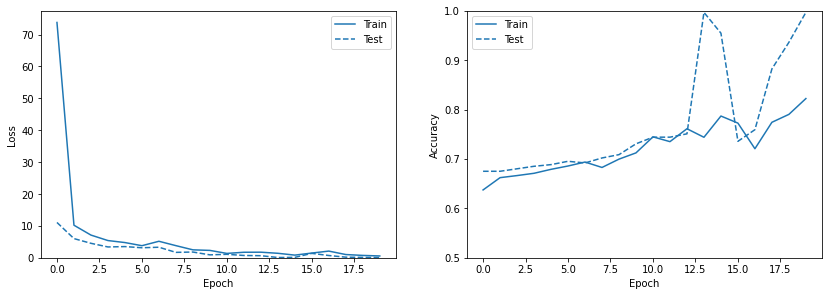

In [76]:
plot_metrics(history_2)

# TO DO

1. 데이터 관리에 fraud가 아닌것의 개수(비율) 조절해서 돌려보기<br>
2. 나만의 모델 만들어보기. => 추가 삭제 개수 늘림 줄임 다 가능